In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df = pd.read_csv('C:/Users/colek/baseball_mvp_cleaned.csv')
df.head()

,Rank,IsMvp,IsMvp_Int,LgYear,Pos,Pos_Int,Lg,Year,Name,Tm,...,ERA,WHIP,G.1,GS,SV,IP,H.1,HR.1,BB.1,SO
0,1,Yes,1,AL83,Batter,1,AL,1983,Cal Ripken Jr.,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,No,0,AL83,Batter,1,AL,1983,Eddie Murray,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,No,0,AL83,Batter,1,AL,1983,Carlton Fisk,CHW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,No,0,AL83,Batter,1,AL,1983,Jim Rice,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,No,0,AL83,Batter,1,AL,1983,Cecil Cooper,MIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


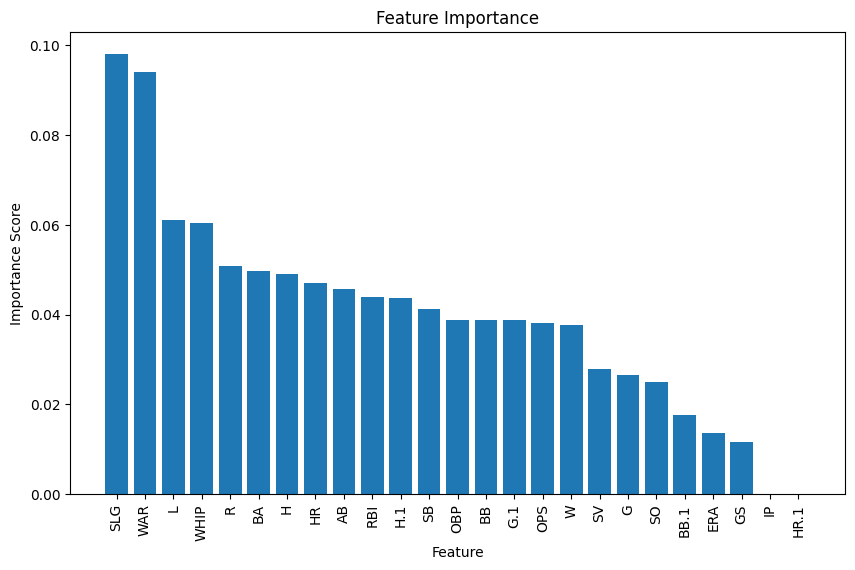

Accuracy: 0.9580246913580247
Precision: 0.3333333333333333
Recall: 0.13333333333333333
F1 Score: 0.19047619047619047


In [3]:
# Load your dataset into a pandas DataFrame
# Assuming df contains your dataset with features and target variable
df = pd.read_csv('baseball_mvp_cleaned.csv')  # Replace 'your_dataset.csv' with your actual dataset file path

# Drop unnecessary columns
df = df.drop(columns=['IsMvp','Rank','Year', 'LgYear', 'Pos', 'Pos_Int','Lg', 'Name', 'Tm', 'Vote Pts', '1st Place', 'Share'])


# Split the data into features (X) and target variable (y)
X = df.drop('IsMvp_Int', axis=1)  # Assuming 'IsMvp' is the target variable
y = df['IsMvp_Int']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Extract feature importance
feature_importance = xgb_classifier.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)